## Observations and Insights 

* Assuming only reason for stopping treatment is due to death, some of the drugs look to have bad side effects. As the bar plot shows, few drugs have less mouse completing the treatment compared to placebo. Those drugs could have caused other issues with side effects causing the mouse to drop out of the treatment earlier than expected.
* Assuming the treatment was the controlled and only difference among the group was the treatment medication, Capomulin and Ramicane were the top successful drugs in reducing the size of the tumors. Quartile range shows that the two treatments have reduced tumor size by end of the treatment compared to other drugs
* With a correlation of 0.84, there is a strong positive correlation between average tumor volume and weight within the subject mice in capomulin regimen. This shows that the higher the weight of the mouse, bigger the tumor volume will be during the Capomulin treatment

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(
    left=mouse_metadata,
    right=study_results,
    on= "Mouse ID",
    how="outer")

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
Mouse_Count=merged_df["Mouse ID"].nunique()
    
print(f"There are {Mouse_Count} mice in this data")


There are 249 mice in this data


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pivot=merged_df.groupby(["Mouse ID", "Timepoint"])

dup=pivot.count()

dup_assert=dup["Drug Regimen"]

tf=dup_assert==1
lis=[]

for i in range(0,len(dup_assert)):
    if tf[i] == False:
        lis.append(i)

In [9]:
#Find the duplicate Mouse ID to delete
reset=dup.reset_index()

ID_dup= [reset.loc[number, "Mouse ID"] for number in lis]
Timepoint_dup= [reset.loc[number, "Timepoint"] for number in lis] 

del_ID=[]
[del_ID.append(name) for name in ID_dup if name not in del_ID] 
del_ID
 

['g989']

In [10]:
#Check to see if there are duplicate
assert dup_assert.count()!=dup_assert.sum() 

In [11]:
#Get all the data for the duplicate mouse ID. 
df=pd.DataFrame({"Mouse ID":ID_dup,
              "Timepoint": Timepoint_dup})

rem_df=pd.merge(df,merged_df,on =("Mouse ID", "Timepoint"), how="left")

rem_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,g989,0,Propriva,Female,21,26,45.000000,0
1,g989,0,Propriva,Female,21,26,45.000000,0
2,g989,5,Propriva,Female,21,26,48.786801,0
3,g989,5,Propriva,Female,21,26,47.570392,0
4,g989,10,Propriva,Female,21,26,51.745156,0
5,g989,10,Propriva,Female,21,26,49.880528,0
6,g989,15,Propriva,Female,21,26,51.325852,1
7,g989,15,Propriva,Female,21,26,53.442020,0
8,g989,20,Propriva,Female,21,26,55.326122,1
9,g989,20,Propriva,Female,21,26,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [13]:
#Clean the data by removing duplicate data
Data_Reorg=merged_df[['Mouse ID','Timepoint', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites']]
Data_Reorg=Data_Reorg.set_index("Mouse ID")


Clean_Data=Data_Reorg.drop(index=del_ID)
Clean_Data=Clean_Data.reset_index()

Clean_Data


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,25,Naftisol,Male,9,30,63.145652,2
1876,z969,30,Naftisol,Male,9,30,65.841013,3
1877,z969,35,Naftisol,Male,9,30,69.176246,4
1878,z969,40,Naftisol,Male,9,30,70.314904,4


In [14]:
#Check for duplicates once more
pivot_2=Clean_Data.groupby(["Mouse ID", "Timepoint"])

dup_2=pivot_2.count()

dup_assert_2=dup_2["Drug Regimen"]


In [15]:
assert dup_assert_2.count()==dup_assert_2.sum()

In [16]:
# Checking the number of mice in the clean DataFrame.
New_Count=Clean_Data["Mouse ID"].nunique()

print(f"There are {New_Count} mice in this data")

There are 248 mice in this data


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Stats_df = merged_df.groupby('Drug Regimen')

mean=Stats_df['Tumor Volume (mm3)'].mean()
median=Stats_df['Tumor Volume (mm3)'].median()
variance=Stats_df['Tumor Volume (mm3)'].var()
stdv=Stats_df['Tumor Volume (mm3)'].std()
sem=Stats_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, 
                           "Median": median, 
                           "Variance": variance, 
                           "Standard Deviation": stdv,                           
                           "SEM": sem})
summary_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df_2=merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_df_2=summary_df_2.rename(columns={"mean":"Mean", 
                                         "median":"Median", 
                                         "var":"Variance", 
                                         "std": "Standard Deviation", 
                                         "sem":"SEM"})

summary_df_2
# This method produces everything in a single groupby function.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

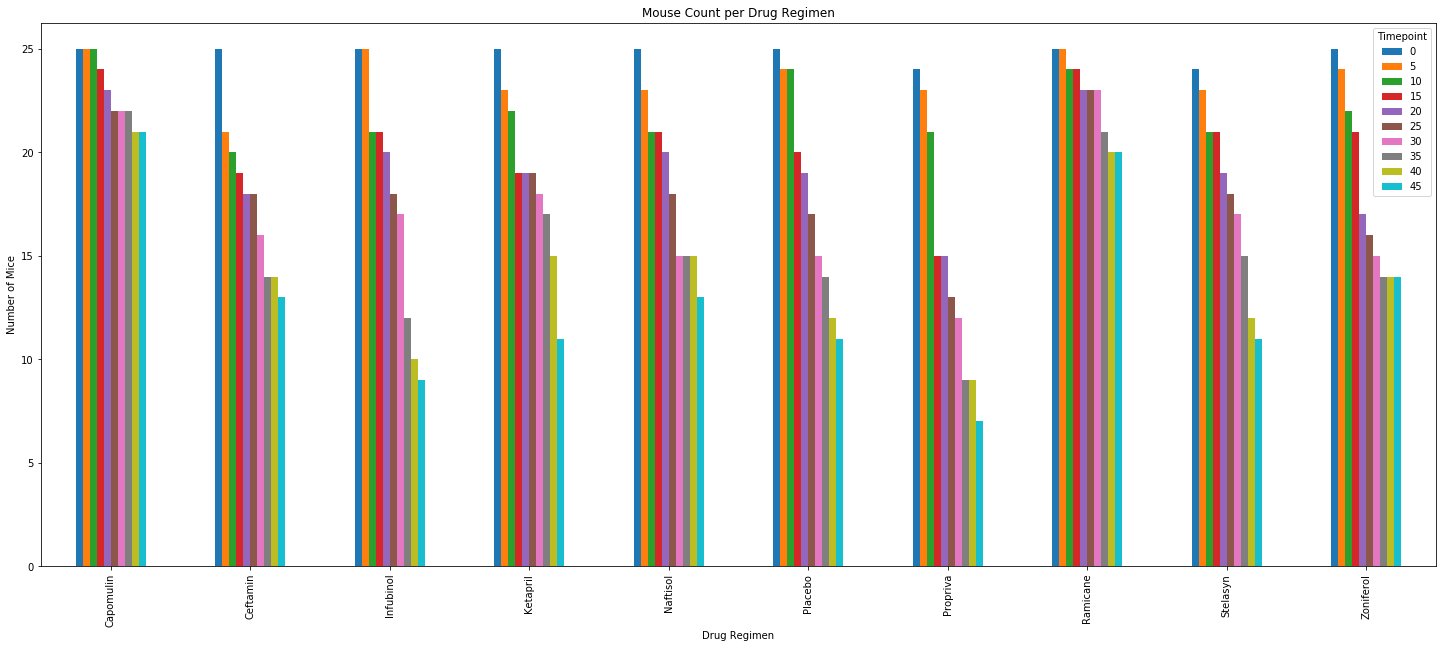

In [19]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_df=Clean_Data.groupby(["Drug Regimen", "Timepoint"])

bar_count=bar_df["Mouse ID"].count()

bar_count.unstack().plot(kind="bar", figsize=(25,10))

plt.title("Mouse Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

time_value=list(Clean_Data["Timepoint"].unique())
Drug_Regimen=list(bar_count.reset_index()["Drug Regimen"].unique())


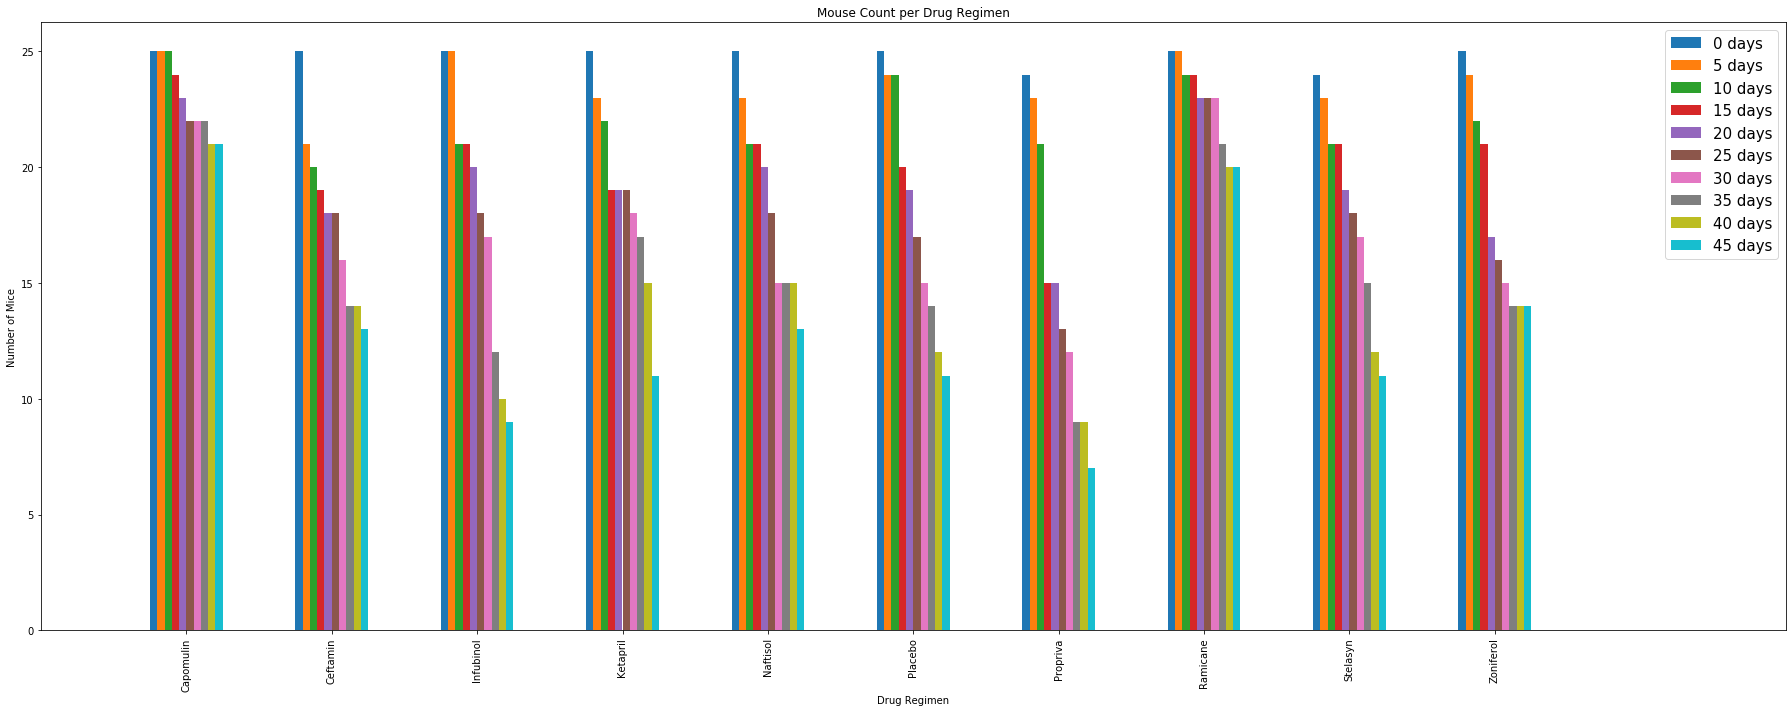

In [22]:
plt.figure(figsize=(25,10))

hp=bar_df.count().reset_index()

x_axis=np.arange((len(Clean_Data["Drug Regimen"].unique())))

width=.05
add=-width*(len(Clean_Data["Drug Regimen"].unique()))/2

for time in time_value:
    plt.bar(
        x=x_axis+add,
        height=hp["Mouse ID"].loc[hp["Timepoint"]==time],
        label=f"{time} days",
        width=width,
        align="edge"
        )
    add = add + width

plt.xlim(-1, len(x_axis)+1)
    
plt.xticks(x_axis, Drug_Regimen, rotation="vertical")
plt.legend(loc=1,prop={'size': 15})
plt.title("Mouse Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()


## Pie Plots

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_count=Clean_Data.groupby(["Sex"]).count()["Mouse ID"]
Gender_count

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

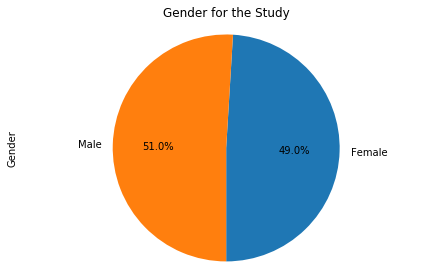

In [24]:
Gender_count.plot(kind="pie",
                  autopct='%1.1f%%', 
                  startangle=270, 
                 )

plt.title("Gender for the Study")
plt.ylabel("Gender")

plt.tight_layout()
plt.axis("equal")
plt.show()



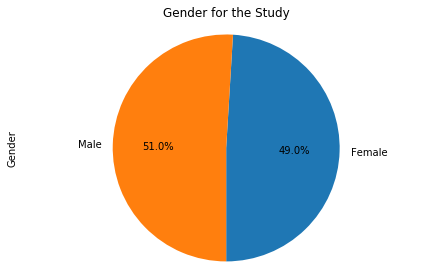

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_data=Gender_count.reset_index()

plt.pie(
    pie_data["Mouse ID"], 
    labels=list(pie_data["Sex"]),
    autopct="%1.1f%%",
    startangle=270,
    )

plt.title("Gender for the Study")
plt.ylabel("Gender")

plt.tight_layout()
plt.axis("equal")
plt.show()




## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

top_treatment=list(summary_df.sort_values(by=["Mean"]).head(4).index)

q=pd.DataFrame()
for treatment in top_treatment:
    q=q.append(Clean_Data.loc[Clean_Data["Drug Regimen"]==treatment])


last_treatment=q.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
last_treatment_df=pd.DataFrame(last_treatment)
IQR_merge_df=pd.merge(last_treatment_df,Clean_Data,on =("Mouse ID", "Timepoint"), how="left")
#tumor=IQR_merge_df.set_index("Drug Regimen")["Tumor Volume (mm3)"]


list1=[]
list2=[]
tumor_plot=[]
for treatment in top_treatment:
    tumor=IQR_merge_df.loc[IQR_merge_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    tumor_plot.append(tumor)
    quartile=tumor.quantile([.25,.5,.75])
    lowerq=(quartile[0.25])
    upperq=quartile[0.75]
    iqr=(upperq-lowerq)
    lower_bound = (lowerq - (1.5*iqr))
    list1.append(lower_bound)
    upper_bound = (upperq + (1.5*iqr))
    list2.append(upper_bound)    

outlier_df=pd.DataFrame({"Drug Regimen":top_treatment,
                        "Lower Limit":list1,
                        "Upper Limit":list2})


for i in range(0,len(outlier_df["Drug Regimen"])):
    drug=outlier_df["Drug Regimen"][i]
    low=outlier_df["Lower Limit"][i]
    high=outlier_df["Upper Limit"][i]
    print(f"{drug} potential outliers are values below {low} and above {high}.")
    print("\n")
    
outlier_df


Ramicane potential outliers are values below 17.912664470000003 and above 54.30681135.


Capomulin potential outliers are values below 20.70456164999999 and above 51.83201549.


Propriva potential outliers are values below 28.76529576625 and above 83.04381145625001.


Ceftamin potential outliers are values below 25.355449580000002 and above 87.66645829999999.




,Drug Regimen,Lower Limit,Upper Limit
0,Ramicane,17.912664,54.306811
1,Capomulin,20.704562,51.832015
2,Propriva,28.765296,83.043811
3,Ceftamin,25.355450,87.666458


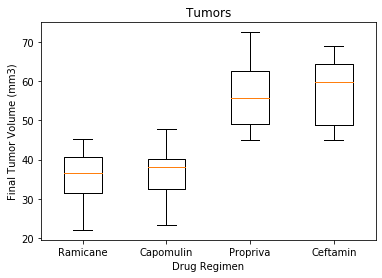

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

    
fig1, ax = plt.subplots()
ax.set_title('Tumors')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')

ax.boxplot(tumor_plot, labels=top_treatment)

plt.show()    
    

## Line and Scatter Plots

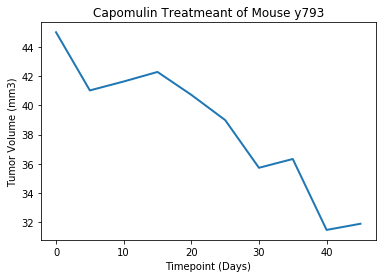

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
import random
capomulin_df = Clean_Data.loc[Clean_Data["Drug Regimen"] == "Capomulin",:]
mouse_list=capomulin_df["Mouse ID"].unique()
mouse=random.choice(mouse_list)
line_df=capomulin_df.loc[capomulin_df["Mouse ID"]==mouse]


line_x = line_df["Timepoint"]
line_y = line_df["Tumor Volume (mm3)"]

plt.title(f'Capomulin Treatmeant of Mouse {mouse}')
plt.plot(line_x, line_y,linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

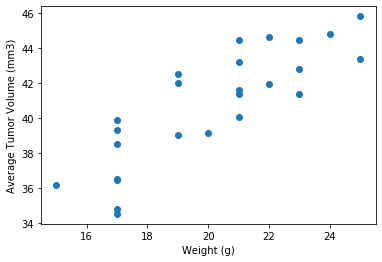

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_avg=capomulin_df.groupby(["Mouse ID"]).mean()
scatter_xvalue=capomulin_avg['Weight (g)']
scatter_yvalue=capomulin_avg['Tumor Volume (mm3)']
plt.scatter(scatter_xvalue,scatter_yvalue)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume fo Capomulin is: 0.8419363424694718


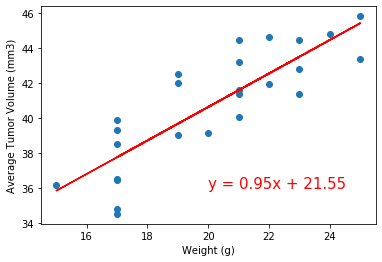

In [31]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from scipy import stats

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(scatter_xvalue, scatter_yvalue)
regress_values = scatter_xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(scatter_xvalue, scatter_yvalue)
plt.plot(scatter_xvalue,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and average tumor volume fo Capomulin is: {rvalue}")

plt.show()
